# Variational Autoencoder for MNIST


## What we will do:

In this exercise, we want you to implement and to train a VAE.

Dataset

Use the MNIST dataset. You can download it using tensorflow, using
tensorflow.keras.datasets.mnist.load data()

The tutorial to VAE linked in the introduction also describes how to obtain the data. Note: do not binarise
MNIST, only normalise the pixel values between 0 and 1, and split it into a training and a test set.

Model

Use a two-dimensional latent space. Use a multivariate diagonal Gaussian distribution as approximate
posterior qϕ(z|x). The encoder neural network, which outputs the mean and standard deviation of qϕ(z|x),
should consist of 2 hidden layers (dense/fully connected) with 256 units each and ReLU activation functions.
Use also a multivariate diagonal Gaussian distribution as likelihood pθ(x|z). The decoder neural network, which
outputs only the mean of pθ(x|z), should consist of 2 hidden layers (dense/fully connected) with 256 units
each and ReLU activation functions. Implement the standard deviation for the decoder distribution as
one (!) floating-point, trainable variable (make it a variable of the model, i.e. so that it does not depend on
the input x as all the other layer outputs do). Use a multivariate diagonal standard normal distribution as
prior p(z). Note: using a Bernoulli likelihood, as it is the case in most tutorials, is only possible for binarised
versions of MNIST—so you should not do it here.


In [1]:
# For automatic file reloading
%load_ext autoreload
%autoreload 2
%matplotlib inline

### We import the neccessary libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from exercise_code.VAE import VAE
from exercise_code.sampling import Sampling
from exercise_code.task_3_plots import plot_losses, plot_generated, plot_all

### Set all the required parameters

In [3]:
parameters = {
    "input_shape": (28, 28, 1),
    "output_shape": 784,
    "intermediate_layers": 256,
    "latent_dim": 2,
    "adam_learning_rate": 0.001,
    "batch_size": 128,
    "epochs": 100
}

### Build the encoder

In [12]:
encoder_inputs = keras.Input(shape=parameters["input_shape"])
x = layers.Flatten()(encoder_inputs)

# First hidden layer
x = layers.Dense(parameters["intermediate_layers"], activation="relu", name="hidden_layer_1")(x)
# Second hidden layer
x = layers.Dense(parameters["intermediate_layers"], activation="relu", name="hidden_layer_2")(x)

z_mean = layers.Dense(parameters["latent_dim"], name="z_mean")(x)
z_log_var = layers.Dense(parameters["latent_dim"], name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 hidden_layer_1 (Dense)         (None, 256)          200960      ['flatten_1[0][0]']              
                                                                                                  
 hidden_layer_2 (Dense)         (None, 256)          65792       ['hidden_layer_1[0][0]']         
                                                                                            

### Build the decoder

In [13]:
latent_inputs = keras.Input(shape=(parameters["latent_dim"],))

# First hidden layer
X = layers.Dense(parameters["intermediate_layers"], activation="relu", name="hidden_layer_1")(latent_inputs)
# Second hidden layer
X = layers.Dense(parameters["intermediate_layers"], activation="relu", name="hidden_layer_2")(X)

decoder_outputs = layers.Dense(parameters["output_shape"], activation="sigmoid", name="output")(X)
decoder_outputs = layers.Reshape(parameters["input_shape"], name="reshape")(decoder_outputs)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               8448      
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               65792     
                                                                 
 output (Dense)              (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 275,728
Trainable params: 275,728
Non-trainable params: 0
_________________________________________________________________


### Train the VAE and display all plots

469/469 [==============================] - 4s 6ms/step - loss: 227.0285 - reconstruction_loss: 184.6861 - kl_loss: 3.6704
Plotting all losses


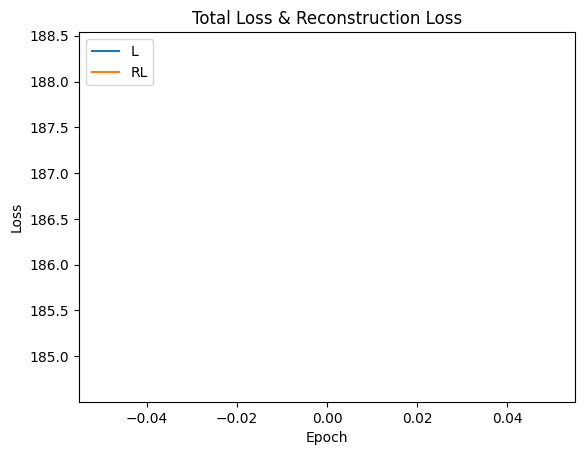

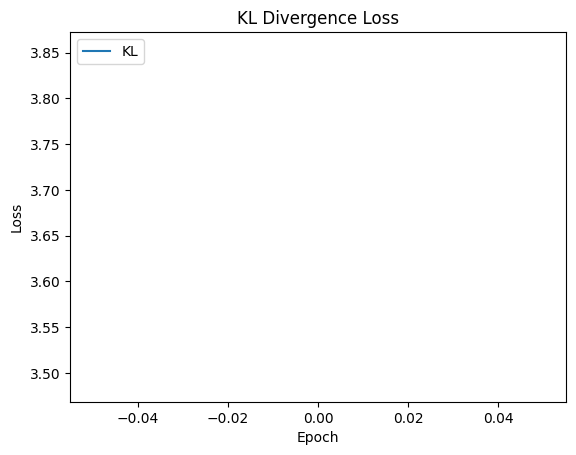

Plotting latent space


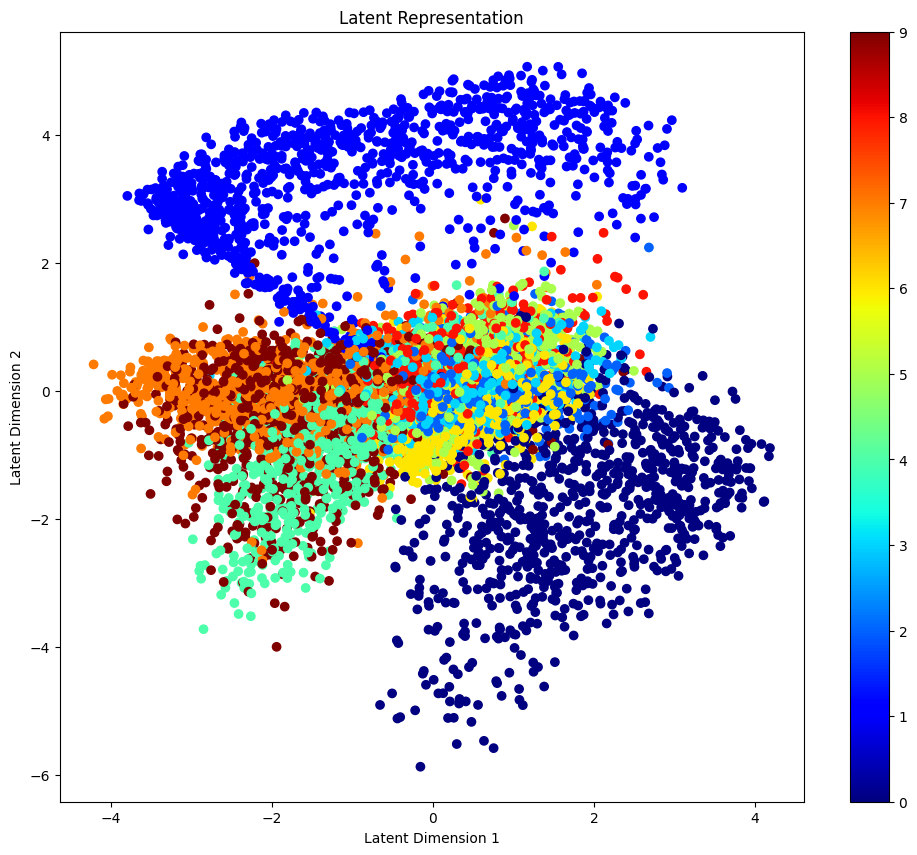

Plotting reconstructions


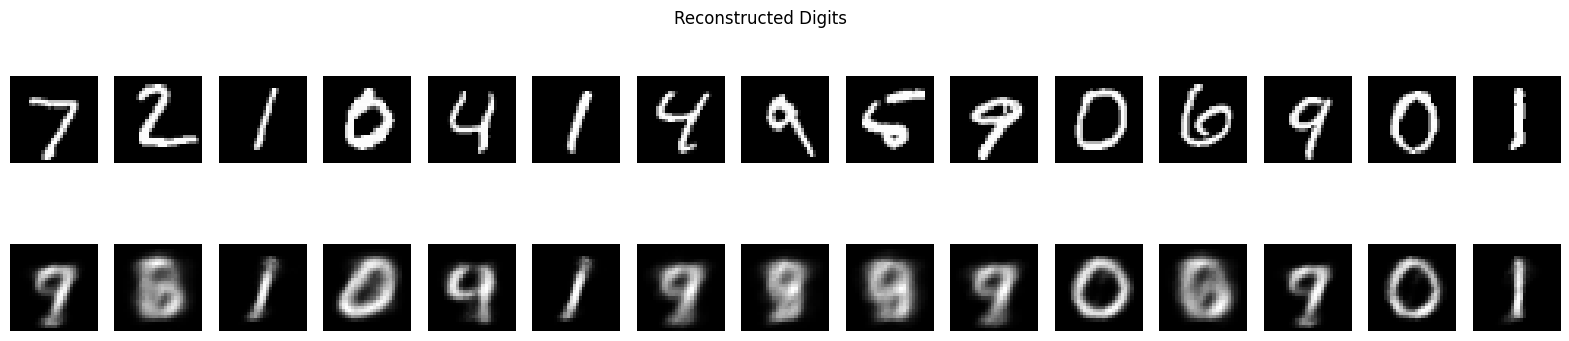

Plotting generated digits


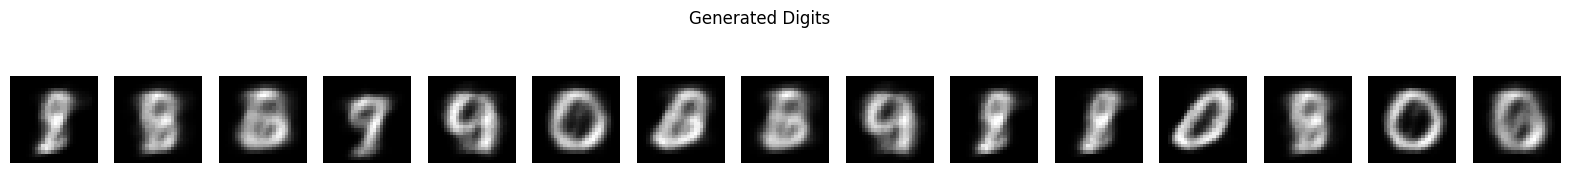

Plotting 2D manifold


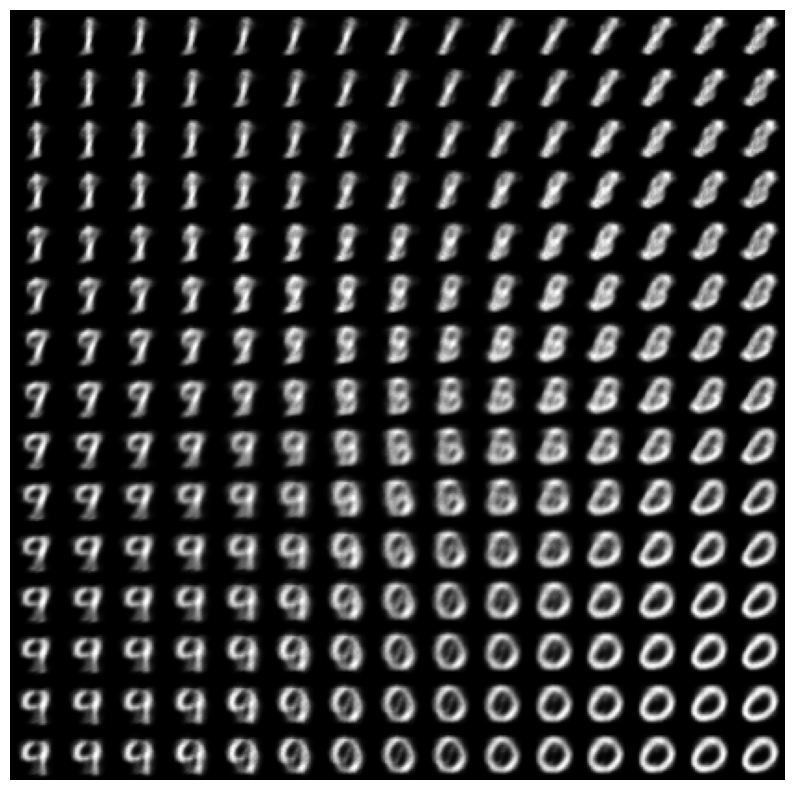

Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 165.0754 - reconstruction_loss: 160.1933 - kl_loss: 2.9831
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 158.4120 - reconstruction_loss: 153.9841 - kl_loss: 3.1717
Epoch 3/4
469/469 [==============================] - 3s 6ms/step - loss: 153.6817 - reconstruction_loss: 149.5240 - kl_loss: 3.3091
Epoch 4/4
469/469 [==============================] - 3s 6ms/step - loss: 150.5909 - reconstruction_loss: 146.3709 - kl_loss: 3.4362
Plotting all losses


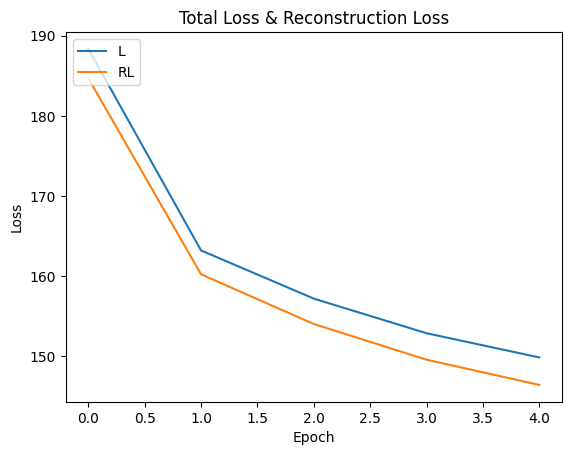

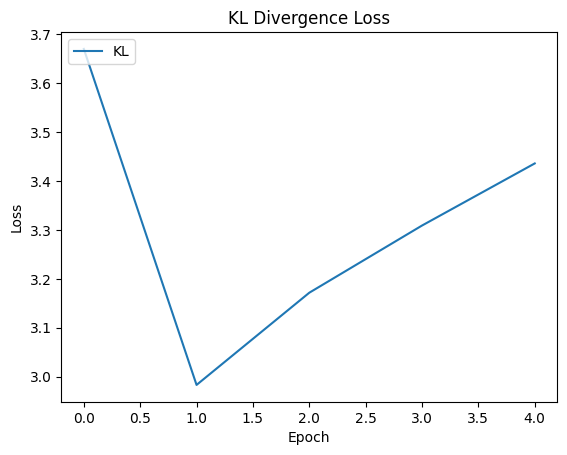

Plotting latent space


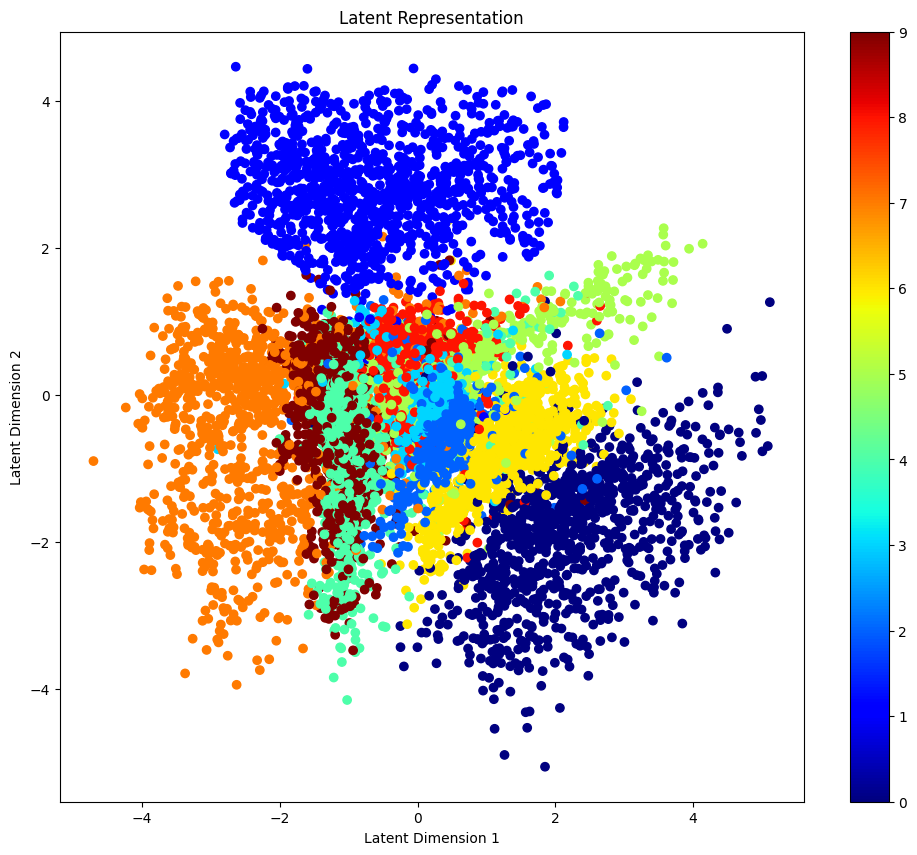

Plotting reconstructions


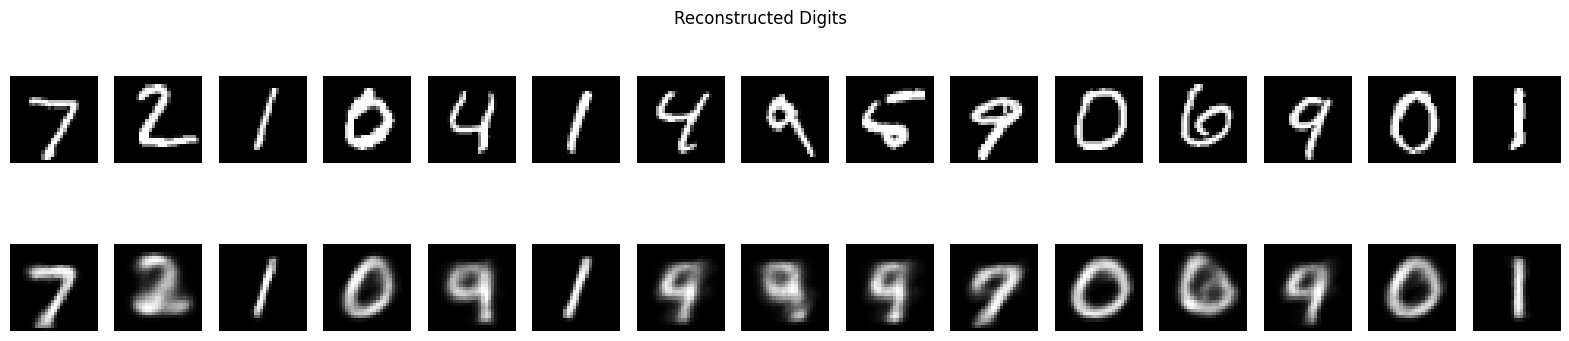

Plotting generated digits


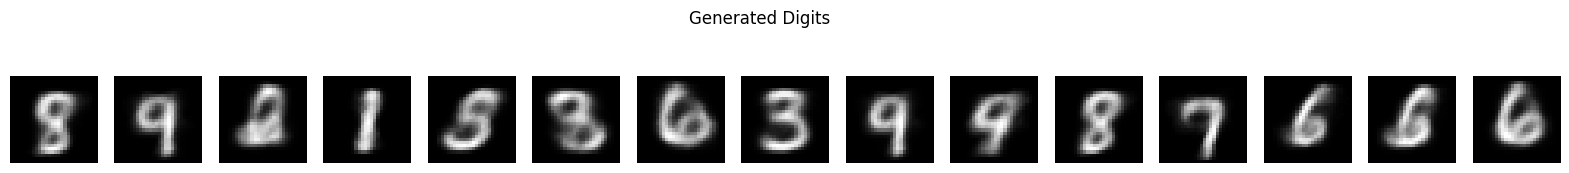

Plotting 2D manifold


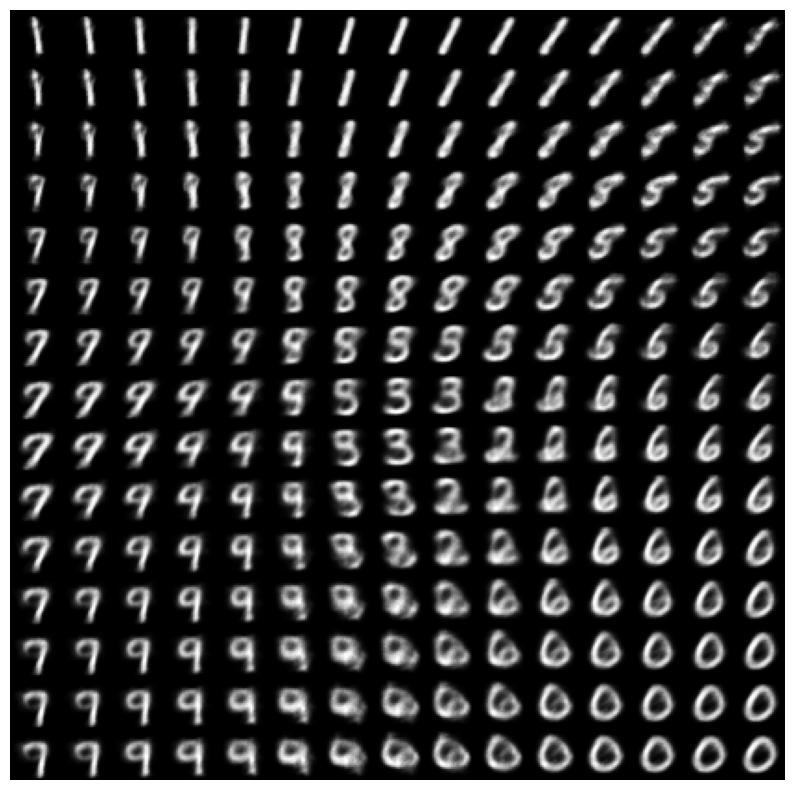

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 147.9202 - reconstruction_loss: 143.9516 - kl_loss: 3.5014
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 146.1483 - reconstruction_loss: 142.2550 - kl_loss: 3.5517
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 144.5347 - reconstruction_loss: 140.9754 - kl_loss: 3.5705
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 143.7116 - reconstruction_loss: 139.8452 - kl_loss: 3.5955
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 142.5572 - reconstruction_loss: 139.1237 - kl_loss: 3.6046
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 141.9732 - reconstruction_loss: 138.3186 - kl_loss: 3.6103
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 141.2913 - reconstruction_loss: 137.6580 - kl_loss: 3.6353
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - l

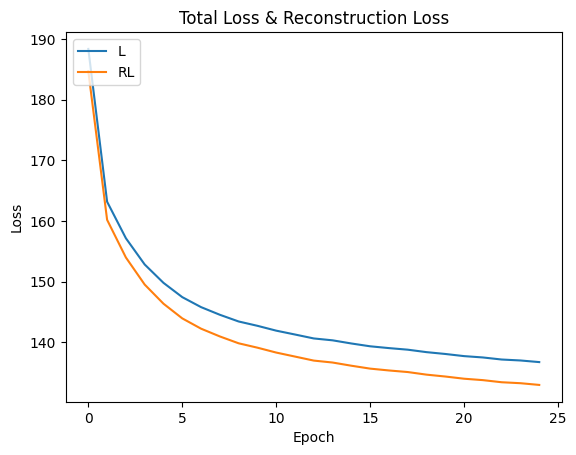

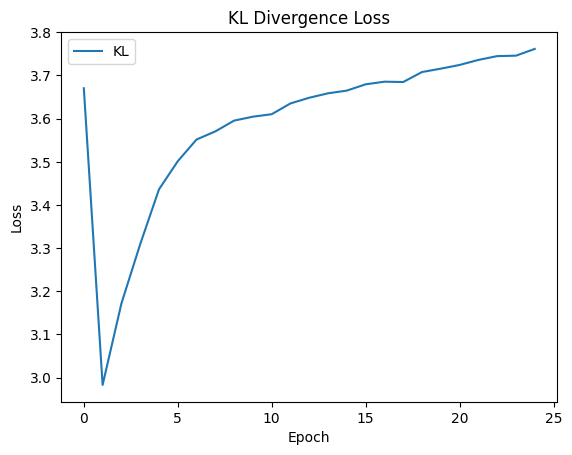

Plotting latent space


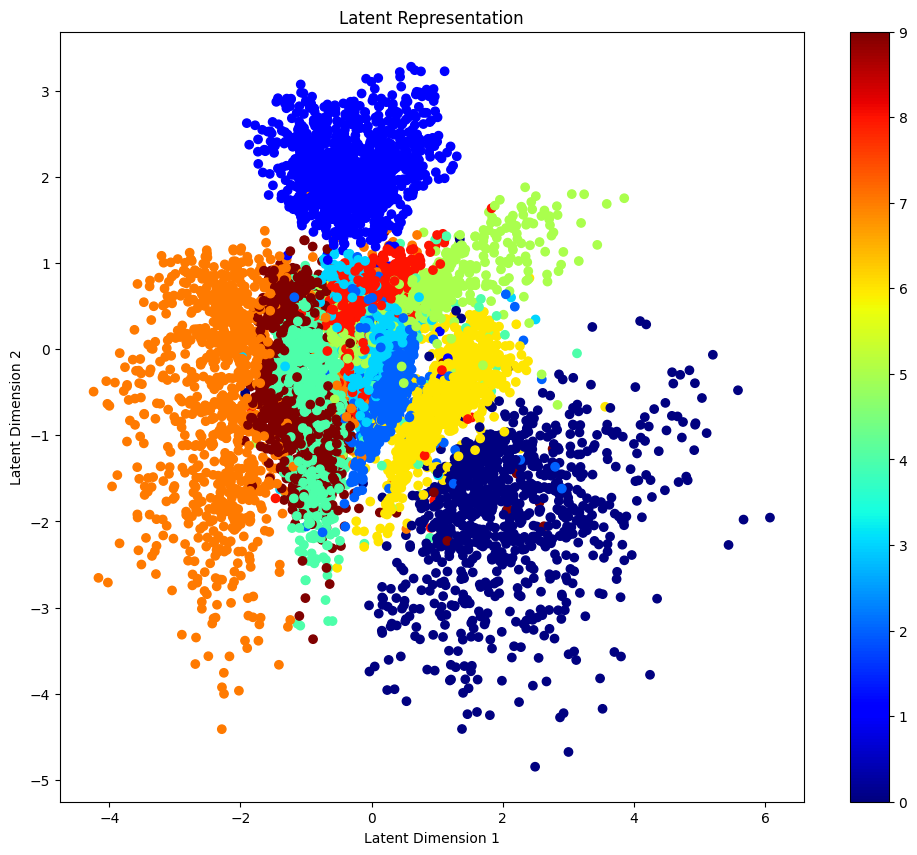

Plotting reconstructions


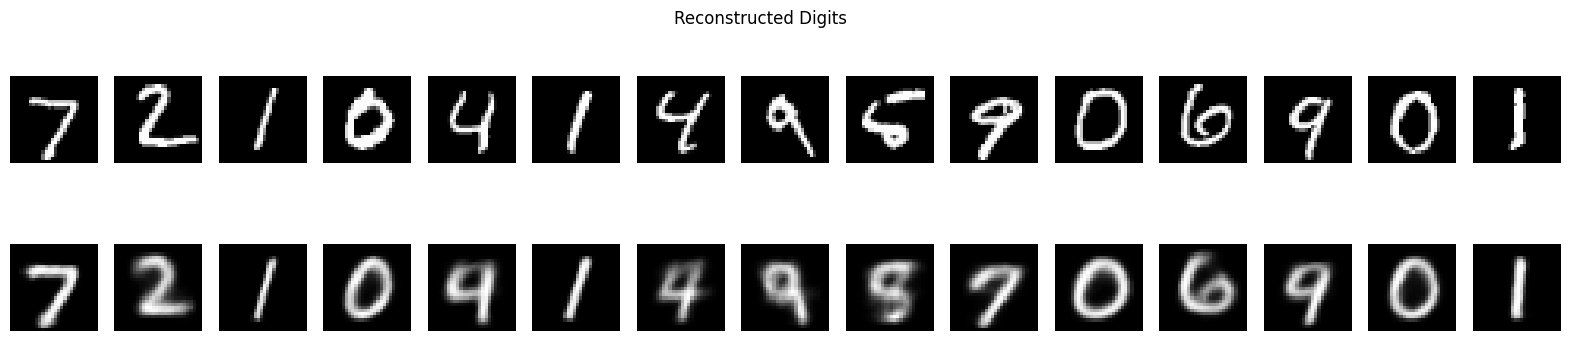

Plotting generated digits


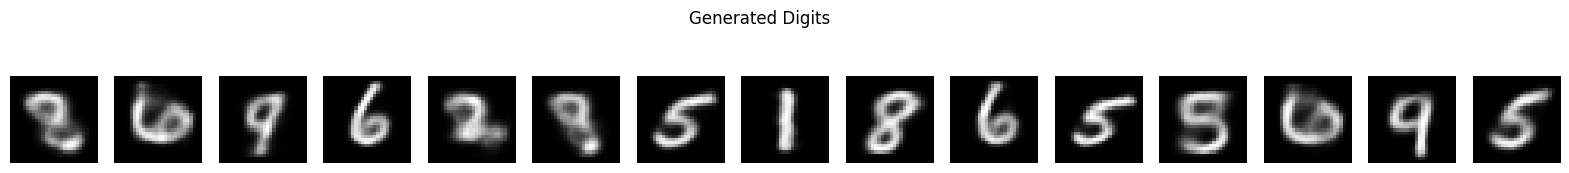

Plotting 2D manifold


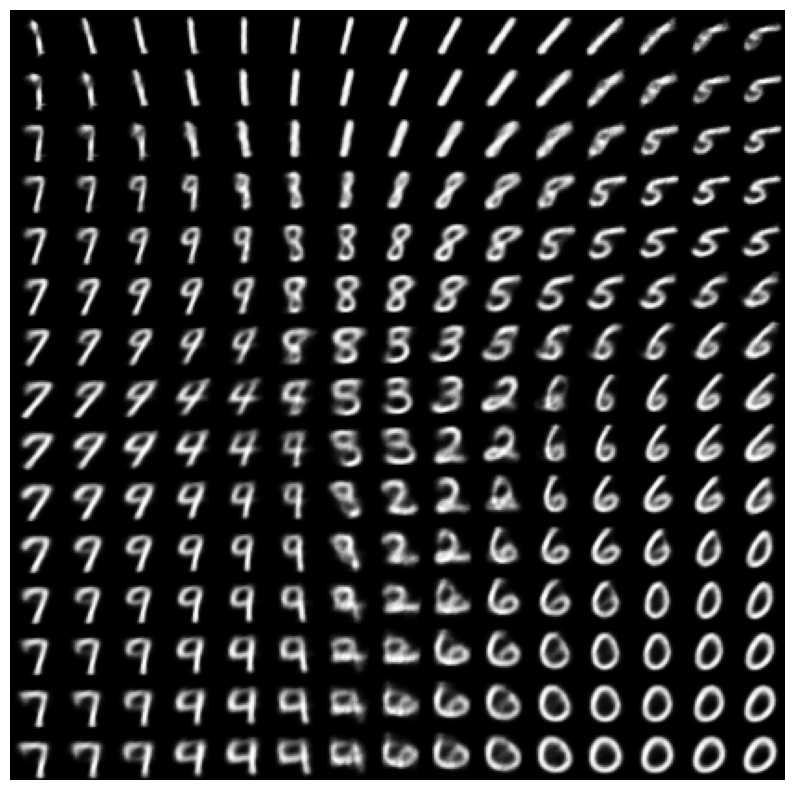

Epoch 1/25
469/469 [==============================] - 3s 6ms/step - loss: 136.3940 - reconstruction_loss: 132.7102 - kl_loss: 3.7737
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 136.1666 - reconstruction_loss: 132.5611 - kl_loss: 3.7802
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 136.0241 - reconstruction_loss: 132.3414 - kl_loss: 3.7873
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 136.0242 - reconstruction_loss: 131.9994 - kl_loss: 3.7928
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 136.0449 - reconstruction_loss: 131.9086 - kl_loss: 3.8100
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 135.6164 - reconstruction_loss: 131.7483 - kl_loss: 3.8096
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 134.9351 - reconstruction_loss: 131.4541 - kl_loss: 3.8292
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - l

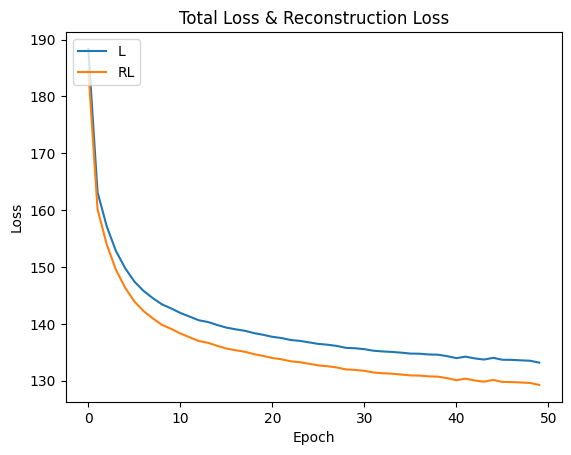

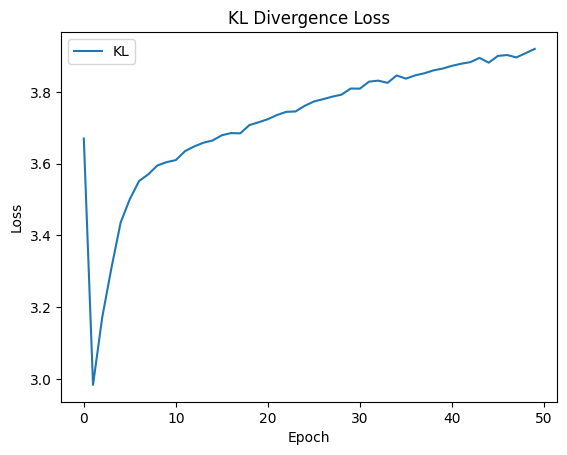

Plotting latent space


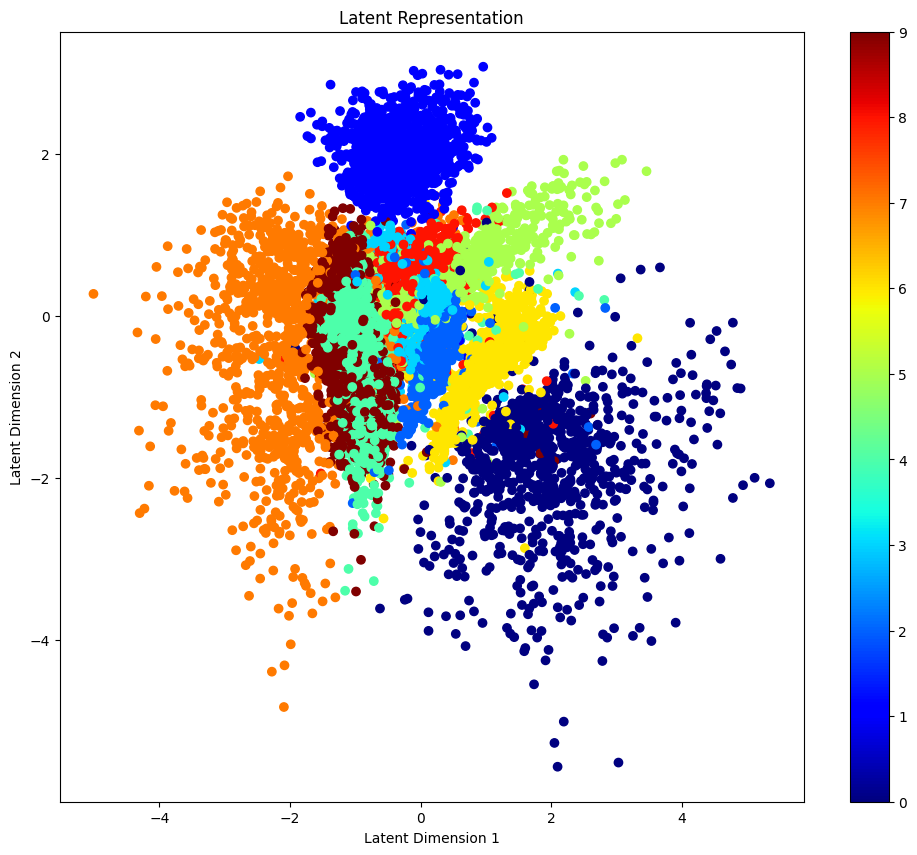

Plotting reconstructions


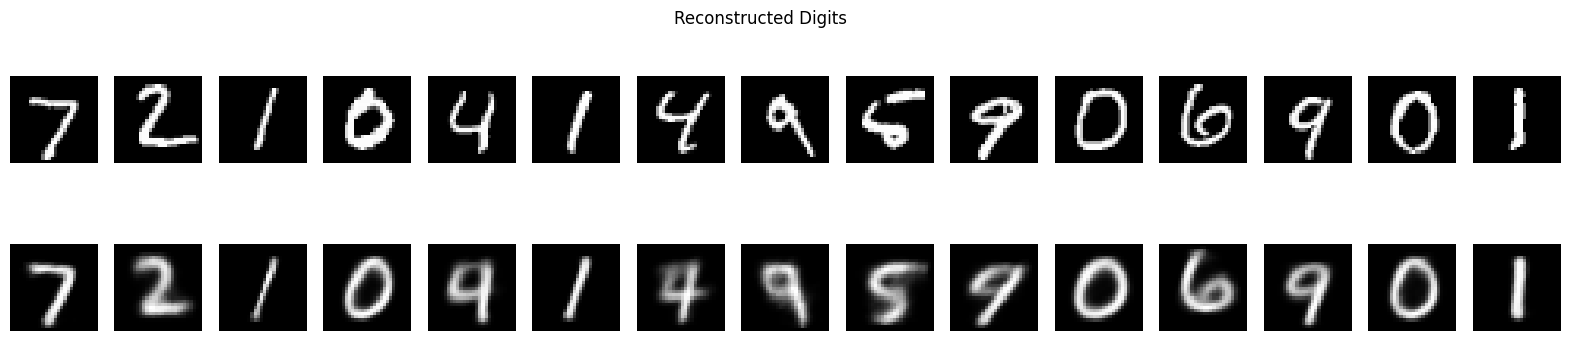

Plotting generated digits


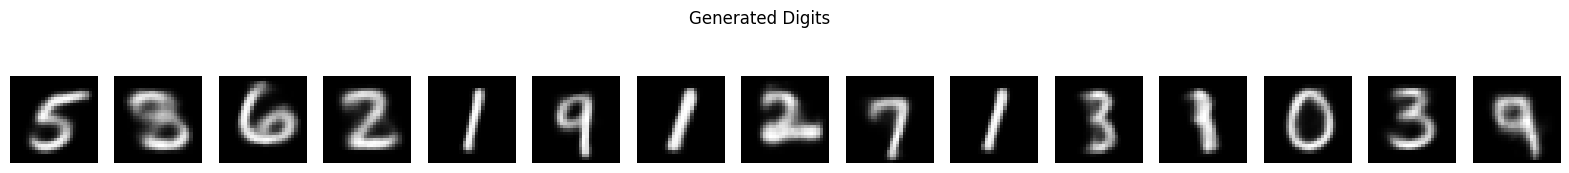

Plotting 2D manifold


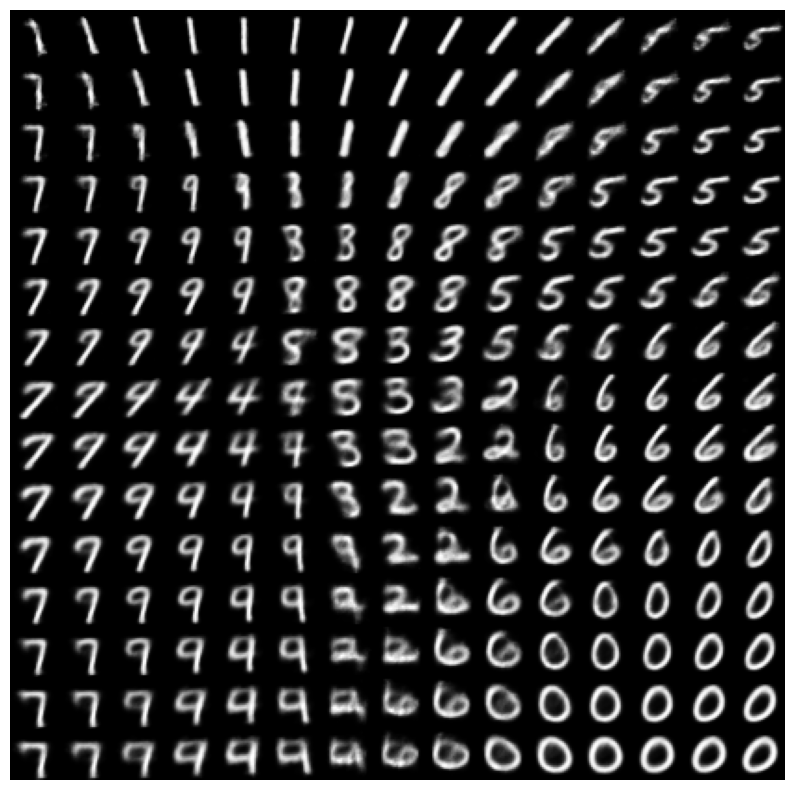

In [6]:
# Perform the experiments

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255


# Create an instance of the VAE class
vae = VAE(encoder, decoder, scale=28*28)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=parameters["adam_learning_rate"])
vae.compile(optimizer)

loss_history = {
    'loss': [],
    'reconstruction_loss': [],
    'kl_loss': []
}

# Train the model for each stage and accumulate the losses
for stage, num_epochs in enumerate([1, 4, 20, 25]):
    # Train the model for the specified number of epochs
    h = vae.fit(x_train, epochs=num_epochs, batch_size=parameters["batch_size"])
    
    # Concatenate the dictionaries
    for key in loss_history.keys():
        loss_history[key] = loss_history[key] + h.history[key]

    # Plot all displays
    plot_all(vae, x_test, y_test, loss_history)

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 133.4487 - reconstruction_loss: 129.2955 - kl_loss: 3.9123
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 132.9325 - reconstruction_loss: 129.1358 - kl_loss: 3.9285
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 132.8949 - reconstruction_loss: 129.0572 - kl_loss: 3.9305
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 132.8461 - reconstruction_loss: 129.1474 - kl_loss: 3.9302
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 133.5386 - reconstruction_loss: 129.6033 - kl_loss: 3.9231
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 132.8094 - reconstruction_loss: 129.0003 - kl_loss: 3.9317
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 132.4102 - reconstruction_loss: 128.7776 - kl_loss: 3.9405
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - l

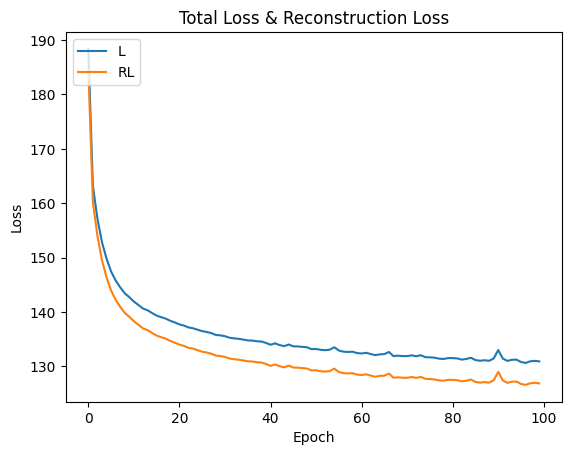

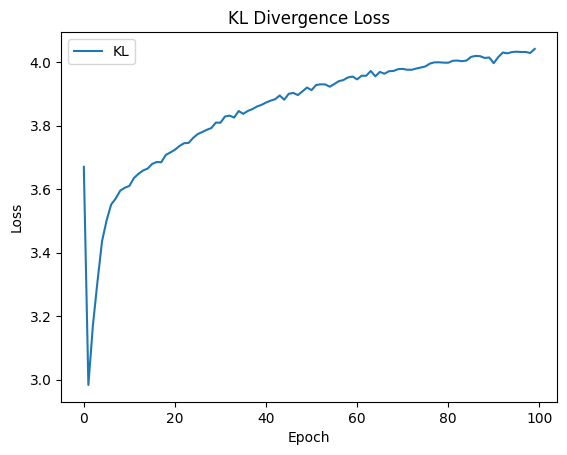

Plotting latent space


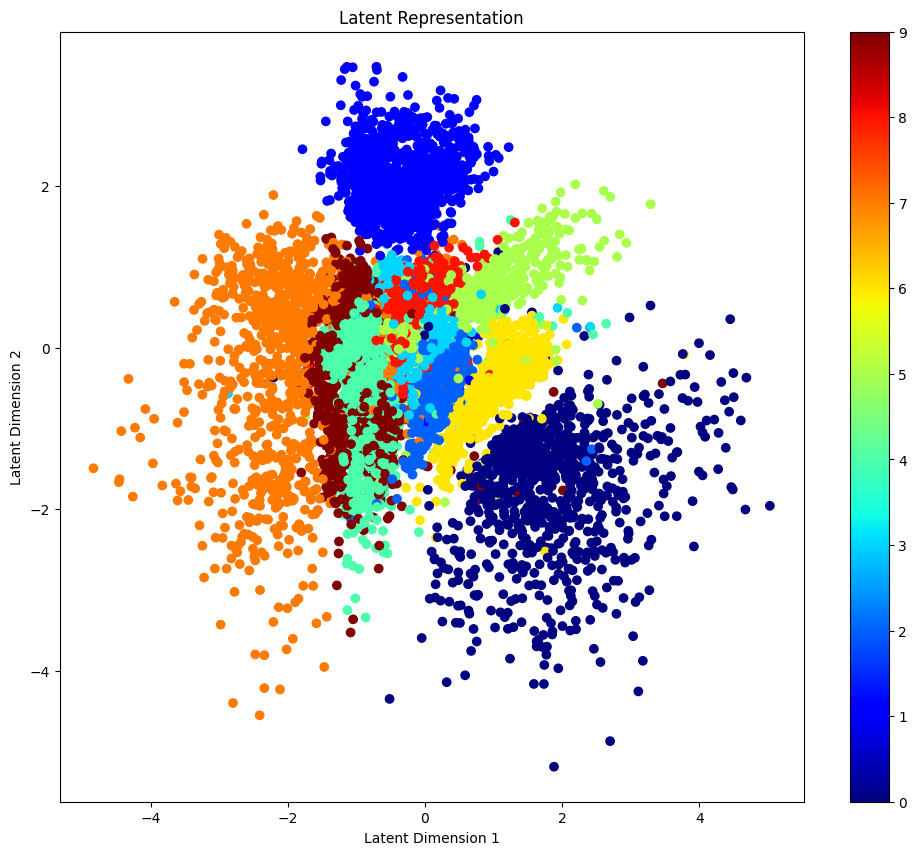

Plotting reconstructions


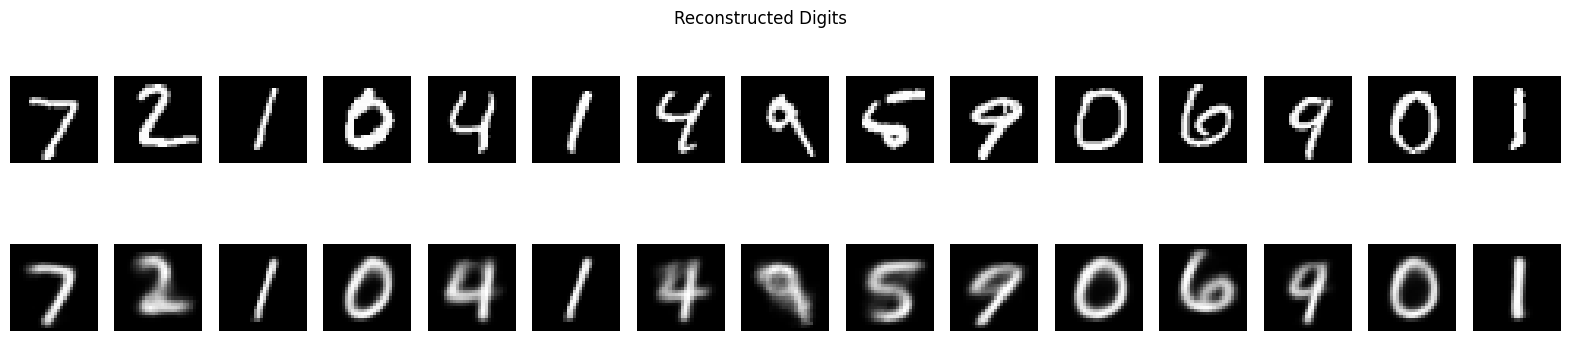

Plotting generated digits


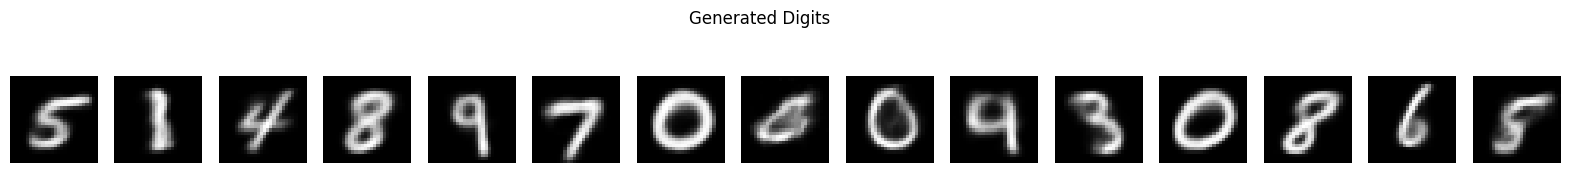

Plotting 2D manifold


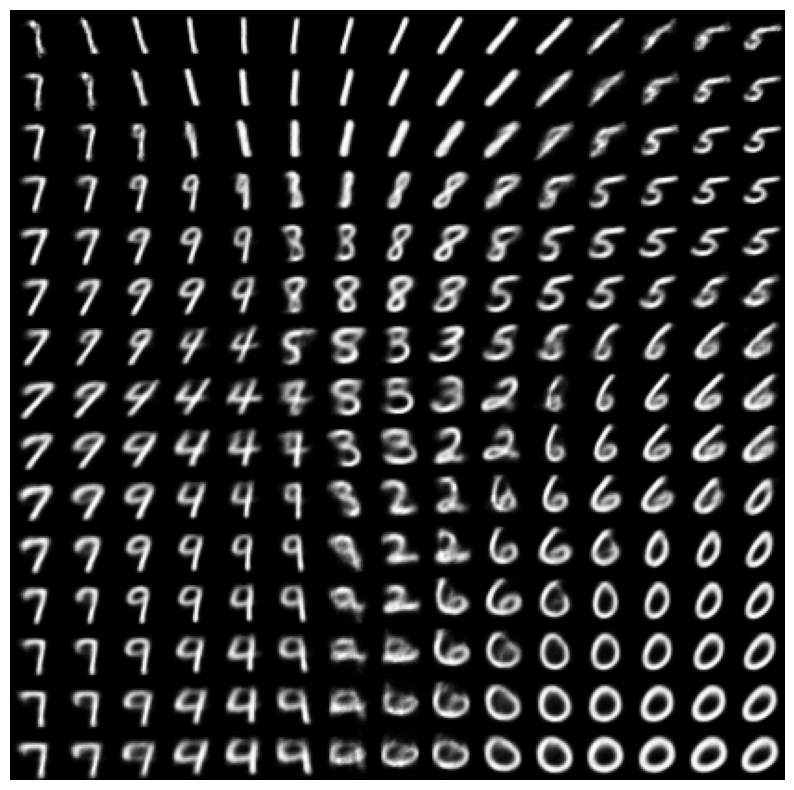

In [7]:
# Plot after convergence (Continued training until 100 epochs were reached)
h = vae.fit(x_train, epochs=50, batch_size=128)

for key in loss_history.keys():
        loss_history[key] = loss_history[key] + h.history[key]

plot_all(vae, x_test, y_test, loss_history)

### Change the latent space dimension to 32

In [14]:
# Change latent_dim in the parameters variable
parameters["latent_dim"] = 32
parameters

{'input_shape': (28, 28, 1),
 'output_shape': 784,
 'intermediate_layers': 256,
 'latent_dim': 32,
 'adam_learning_rate': 0.001,
 'batch_size': 128,
 'epochs': 100}

### Train the VAE in the new latent dimension

###### <font color='red'>IMPORTANT:</font> The ENCODER and DECODER set up cells need to be ran again to restart the training and change their latent sizes

Epoch 1/100
469/469 [==============================] - 4s 6ms/step - loss: 195.1999 - reconstruction_loss: 134.3987 - kl_loss: 2.8079
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 87.0306 - reconstruction_loss: 80.3790 - kl_loss: 3.3964
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 77.5642 - reconstruction_loss: 73.1652 - kl_loss: 3.2815
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 73.6423 - reconstruction_loss: 69.8167 - kl_loss: 3.2081
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 71.0996 - reconstruction_loss: 67.6095 - kl_loss: 3.1591
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 69.3141 - reconstruction_loss: 66.1113 - kl_loss: 3.1238
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 68.2853 - reconstruction_loss: 64.9609 - kl_loss: 3.1040
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss:

469/469 [==============================] - 3s 6ms/step - loss: 60.8493 - reconstruction_loss: 57.9371 - kl_loss: 2.9914
Epoch 63/100
469/469 [==============================] - 3s 6ms/step - loss: 60.8384 - reconstruction_loss: 57.9450 - kl_loss: 2.9915
Epoch 64/100
469/469 [==============================] - 3s 6ms/step - loss: 60.8161 - reconstruction_loss: 57.8970 - kl_loss: 2.9908
Epoch 65/100
469/469 [==============================] - 3s 6ms/step - loss: 60.7863 - reconstruction_loss: 57.9048 - kl_loss: 2.9911
Epoch 66/100
469/469 [==============================] - 3s 6ms/step - loss: 60.8202 - reconstruction_loss: 57.9137 - kl_loss: 2.9889
Epoch 67/100
469/469 [==============================] - 3s 6ms/step - loss: 60.7086 - reconstruction_loss: 57.8288 - kl_loss: 2.9891
Epoch 68/100
469/469 [==============================] - 3s 7ms/step - loss: 60.8942 - reconstruction_loss: 57.8008 - kl_loss: 2.9870
Epoch 69/100
469/469 [==============================] - 3s 6ms/step - loss: 60.592

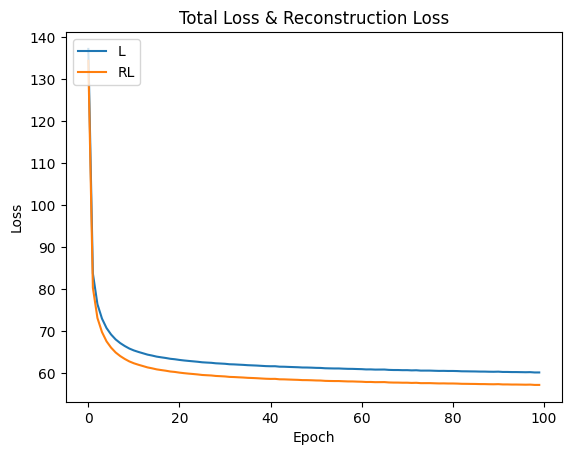

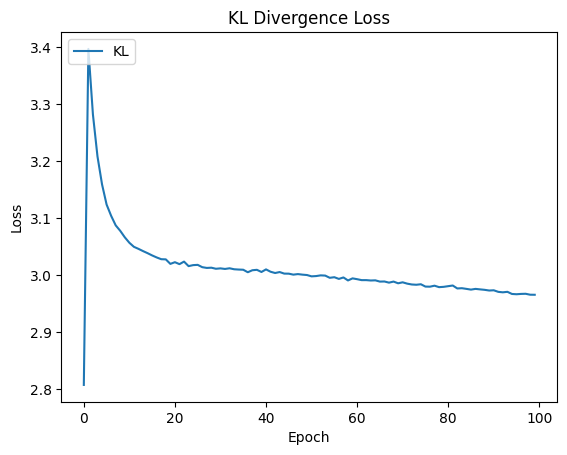

Plotting generated digits


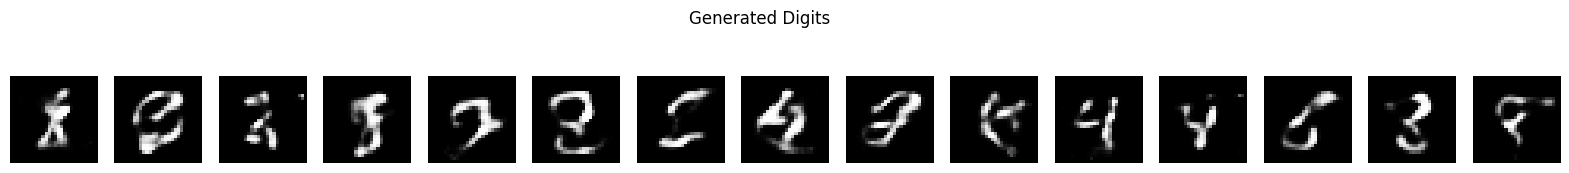

In [15]:
# Perform the experiment

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255


# Create an instance of the VAE class
vae = VAE(encoder, decoder)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=parameters["adam_learning_rate"])
vae.compile(optimizer)

# Plot after the 100th epoch
h = vae.fit(x_train, epochs=parameters["epochs"], batch_size=parameters["batch_size"])

print("Plotting losses")
plot_losses(h.history)

print("Plotting generated digits")
plot_generated(vae)
